In [23]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime

In [47]:
plt.rcParams.update({"axes.grid": True})

## Formateo de Datos

In [98]:
flight_delay_data = pd.read_csv('Data/dataset_SCL.csv')
flight_delay_data.head()

/home/alonso/Desktop/Postulación IBM/Data-Scientist-Challenge-LATAM/data_scientist_challenge_env/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3221: DtypeWarning: Columns (1,6) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,Fecha-I,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Ori-O,Des-O,Emp-O,DIA,MES,AÑO,DIANOM,TIPOVUELO,OPERA,SIGLAORI,SIGLADES
0,2017-01-01 23:30:00,226,SCEL,KMIA,AAL,2017-01-01 23:33:00,226,SCEL,KMIA,AAL,1,1,2017,Domingo,I,American Airlines,Santiago,Miami
1,2017-01-02 23:30:00,226,SCEL,KMIA,AAL,2017-01-02 23:39:00,226,SCEL,KMIA,AAL,2,1,2017,Lunes,I,American Airlines,Santiago,Miami
2,2017-01-03 23:30:00,226,SCEL,KMIA,AAL,2017-01-03 23:39:00,226,SCEL,KMIA,AAL,3,1,2017,Martes,I,American Airlines,Santiago,Miami
3,2017-01-04 23:30:00,226,SCEL,KMIA,AAL,2017-01-04 23:33:00,226,SCEL,KMIA,AAL,4,1,2017,Miercoles,I,American Airlines,Santiago,Miami
4,2017-01-05 23:30:00,226,SCEL,KMIA,AAL,2017-01-05 23:28:00,226,SCEL,KMIA,AAL,5,1,2017,Jueves,I,American Airlines,Santiago,Miami


In [99]:
flight_delay_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68206 entries, 0 to 68205
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Fecha-I    68206 non-null  object
 1   Vlo-I      68206 non-null  object
 2   Ori-I      68206 non-null  object
 3   Des-I      68206 non-null  object
 4   Emp-I      68206 non-null  object
 5   Fecha-O    68206 non-null  object
 6   Vlo-O      68205 non-null  object
 7   Ori-O      68206 non-null  object
 8   Des-O      68206 non-null  object
 9   Emp-O      68206 non-null  object
 10  DIA        68206 non-null  int64 
 11  MES        68206 non-null  int64 
 12  AÑO        68206 non-null  int64 
 13  DIANOM     68206 non-null  object
 14  TIPOVUELO  68206 non-null  object
 15  OPERA      68206 non-null  object
 16  SIGLAORI   68206 non-null  object
 17  SIGLADES   68206 non-null  object
dtypes: int64(3), object(15)
memory usage: 9.4+ MB


In [100]:
len(flight_delay_data['Vlo-I'].unique())

750

In [101]:
flight_delay_data = flight_delay_data.astype(
    {
        'Fecha-I': 'datetime64',
        'Ori-I': 'string',
        'Des-I': 'string',
        'Emp-I': 'string',
        'Fecha-O': 'datetime64',
        'Ori-O': 'string',
        'Des-O': 'string',
        'Emp-O': 'string',
        'DIA': 'Int8',
        'MES': 'Int8',
        'AÑO': 'Int16',
        'DIANOM': 'string',
        'TIPOVUELO': 'string',
        'OPERA': 'string',
        'SIGLAORI': 'string',
        'SIGLADES': 'string'
    }
)

In [102]:
# Fix some numeric labels for Vlo-I column and Vlo-O because there were some floats as strings
list_vlo = ['Vlo-I', 'Vlo-O']

for vlo in list_vlo:
    

    non_string_condition = ~(flight_delay_data[vlo].apply(lambda x: isinstance(x, str)))
    flight_delay_data[non_string_condition] = flight_delay_data[non_string_condition].astype({vlo: 'Int16'})

    # Turn columns into strings
    flight_delay_data = flight_delay_data.astype({vlo: 'string'})

In [103]:
len(flight_delay_data['Vlo-I'].unique())

584

In [110]:
# In case the string value already had a float value, run the folowing block
list_vlo = ['Vlo-I', 'Vlo-O']

for vlo in list_vlo:  

    contains_float_condition = flight_delay_data[vlo].str.contains(".0")
    flight_delay_data[vlo][contains_float_condition] = flight_delay_data[vlo][contains_float_condition].str.replace(".0", "")

/tmp/ipykernel_300435/3402368578.py:7: FutureWarning: The default value of regex will change from True to False in a future version.
  flight_delay_data[vlo][contains_float_condition] = flight_delay_data[vlo][contains_float_condition].str.replace(".0", "")


In [111]:
len(flight_delay_data['Vlo-I'].unique())

427

In [112]:
flight_delay_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68206 entries, 0 to 68205
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Fecha-I    68206 non-null  datetime64[ns]
 1   Vlo-I      68206 non-null  string        
 2   Ori-I      68206 non-null  string        
 3   Des-I      68206 non-null  string        
 4   Emp-I      68206 non-null  string        
 5   Fecha-O    68206 non-null  datetime64[ns]
 6   Vlo-O      68205 non-null  string        
 7   Ori-O      68206 non-null  string        
 8   Des-O      68206 non-null  string        
 9   Emp-O      68206 non-null  string        
 10  DIA        68206 non-null  Int8          
 11  MES        68206 non-null  Int8          
 12  AÑO        68206 non-null  Int16         
 13  DIANOM     68206 non-null  string        
 14  TIPOVUELO  68206 non-null  string        
 15  OPERA      68206 non-null  string        
 16  SIGLAORI   68206 non-null  string       

Una vez formateados los datos, se refleja que existe una fila con un dato `null` para la variable `Vlo-O`. No parece necesario eliminar o hacer cambios a la fila de momento, pues aún no se decide si la información proveída por la variable `Vlo-O` será utilizada para el análisis de tiempos de demora.

In [113]:
flight_delay_data[flight_delay_data['Vlo-O'].isna()]

,Fecha-I,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Ori-O,Des-O,Emp-O,DIA,MES,AÑO,DIANOM,TIPOVUELO,OPERA,SIGLAORI,SIGLADES
6068,2017-01-19 11:00:00,0,SCEL,SPJC,LAW,2017-01-19 11:03:00,<NA>,SCEL,SPJC,56R,19,1,2017,Jueves,I,Latin American Wings,Santiago,Lima


## 1. Figuras y Display de Datos

Con el fin de entender mejor la base de datos, se imprime la cantidad de valores únicos por variable, lo cual da una vista general para proponer visualizaciones adecuadas.

In [114]:
for column in flight_delay_data.columns:
    print(column, ' :', len(flight_delay_data[column].unique()))

Fecha-I  : 53252
Vlo-I  : 427
Ori-I  : 1
Des-I  : 64
Emp-I  : 30
Fecha-O  : 62774
Vlo-O  : 448
Ori-O  : 1
Des-O  : 63
Emp-O  : 32
DIA  : 31
MES  : 12
AÑO  : 2
DIANOM  : 7
TIPOVUELO  : 2
OPERA  : 23
SIGLAORI  : 1
SIGLADES  : 62


### Orígenes y destinos

Se puede ver que sólamente hay un origen, por lo que se asumirá que todos los datos corresponden a salidas desde Santiago de Chile. Por lo tanto, el problema se tratará acotadamente a los retrasos en despegar de los vuelos que salen de Santiago.

Debido a que para las variables de destino existen 3 tipos, la programada, con el sufijo `-I`, la de operación `-O` y la de destino `SIGLADES`, se deriva la pregunta de si son coincidentes los aeropuertos a los que se llegó, versus los que se tenía planificado llegar. Con los siguientes dos bloques de código se puede ver que algunos de los vuelos tienen más de un tipo de destino programado, para cada destino donde realmente aterrizaron, por lo que es posible conjeturar que en el conjunto de datos hay vuelos que aterrizaron en aeropuertos distintos a los que se esperaba. En el caso de operación, este resulta equivalente a `SIGLADES` pues aquellos valores que tienen más de un aeropuerto asociado son en Buenos Aires.

In [115]:
for dest_name, df_dest_name in flight_delay_data.groupby("SIGLADES"):
    
    if len(df_dest_name['Des-I'].unique()) != 1:
        print(
            'Possible values for ', dest_name, ": \n",
            list(df_dest_name['Des-I'].unique()), "\n"
        )

Possible values for  Buenos Aires : 
 ['SAEZ', 'SABE', 'SEGU'] 

Possible values for  Calama : 
 ['SCCF', 'SCFA'] 

Possible values for  Cataratas Iguacu : 
 ['SBFI', 'SARI'] 

Possible values for  Melbourne : 
 ['YMML', 'YSSY'] 

Possible values for  Miami : 
 ['KMIA', 'KJFK'] 

Possible values for  Puerto Montt : 
 ['SCTE', 'SCBA', 'SCCI', 'SCIE'] 

Possible values for  Punta Arenas : 
 ['SCCI', 'SCTE'] 

Possible values for  Quito : 
 ['SEQM', 'SEQU'] 

Possible values for  Rio de Janeiro : 
 ['SBGL', 'SBGR'] 

Possible values for  Temuco : 
 ['SCTE', 'SCQP', 'SCIE'] 



In [118]:
for dest_name, df_dest_name in flight_delay_data.groupby("SIGLADES"):
    
    if len(df_dest_name['Des-O'].unique()) != 1:
        print(
            'Possible values for ', dest_name, ": \n",
            list(df_dest_name['Des-O'].unique()), "\n"
        )

Possible values for  Buenos Aires : 
 ['SAEZ', 'SABE'] 



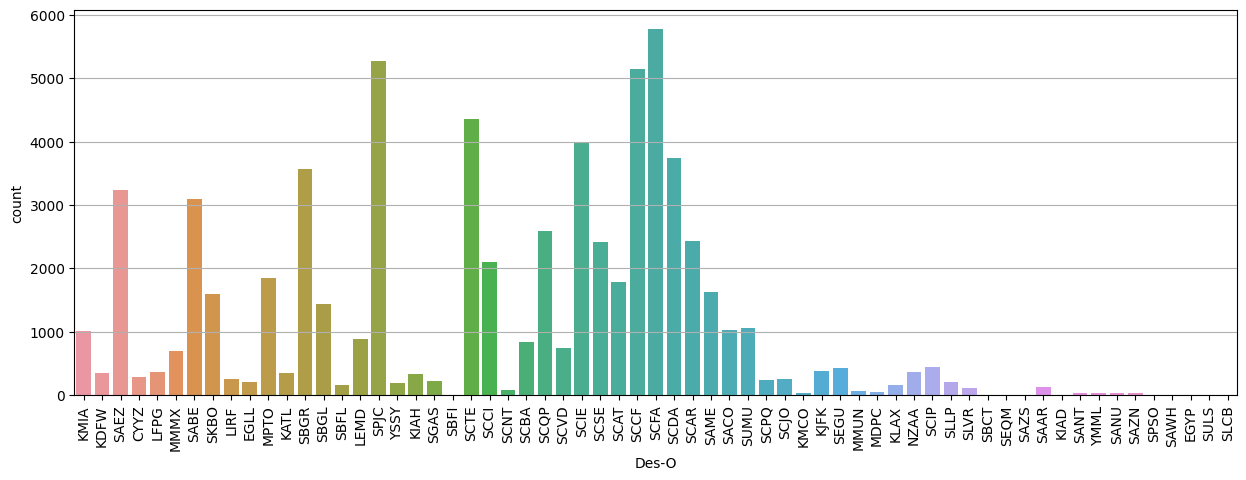

In [132]:
plt.figure(figsize=(15,5))
sns.countplot(
    data=flight_delay_data,
    x='Des-O',
)
plt.xticks(rotation = 90)
plt.show()

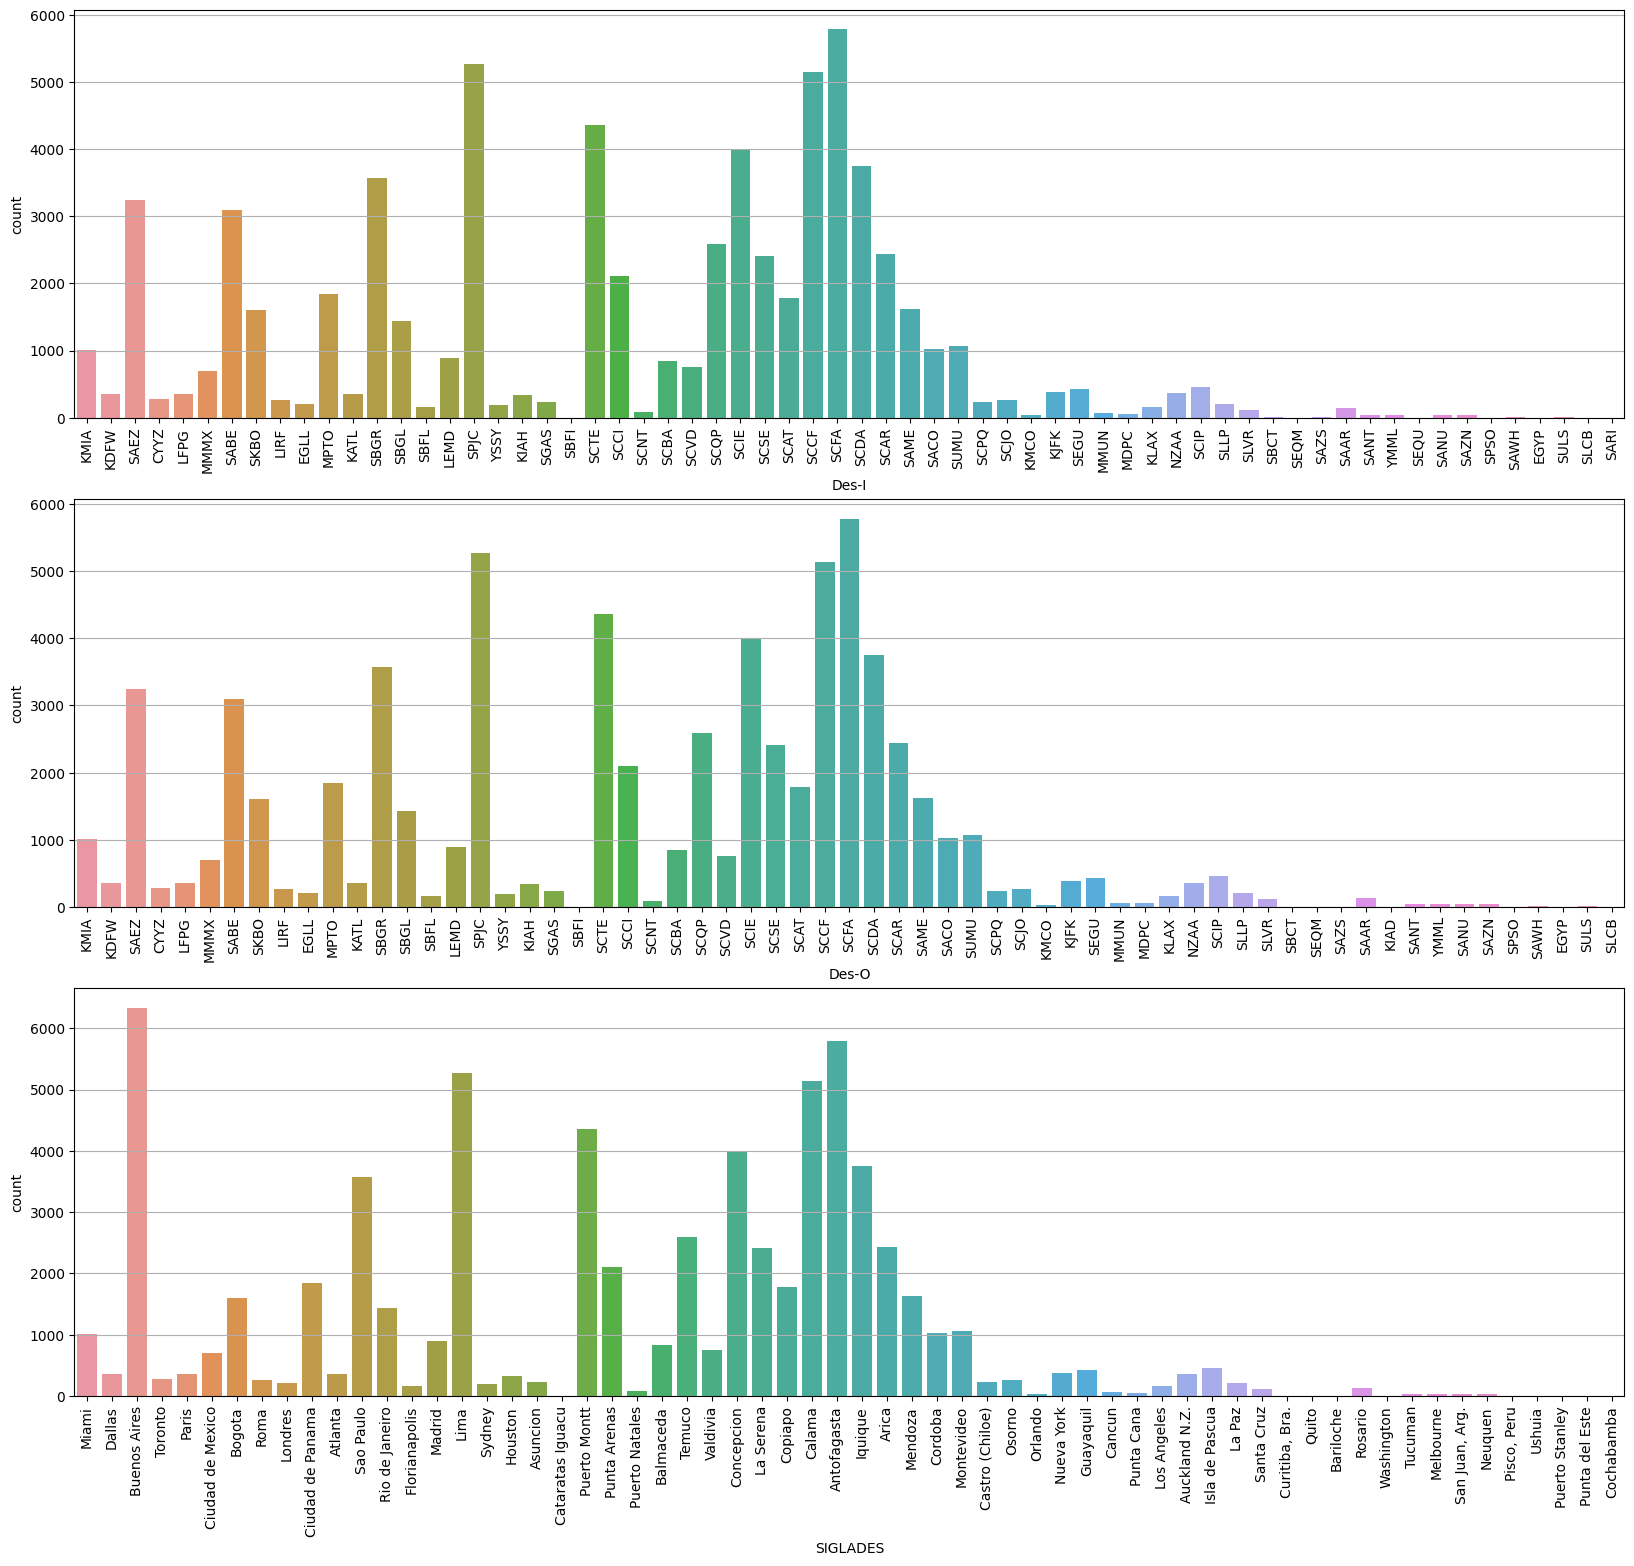

In [134]:
fig, ax = plt.subplots(3, figsize=(20,18))
list_to_display_count = ["Des-I", "Des-O", "SIGLADES"]

for i, column in enumerate(list_to_display_count):

    sns.countplot(ax=ax[i],
        data=flight_delay_data,
        x=column,
    )

    ax[i].tick_params(axis='x', rotation=90)

Se puede ver en el gráfico del bloque anterior que Buenos Aires presenta este aumento en frecuencia de vuelos debido a la suma de los dos aeropuertos que allí se encuentran SAEZ y SABE.

### Cuenta mensual de vuelos por tipo de vuelo y día de la semana

Por otro lado, yendo a una vista mensual de los datos, se denotan los meses donde hay mayor y menor cantidad de vuelos, siendo junio el mes de menos vuelos, mientras que diciembre correspondería al de mayor volumen de vuelos superando los 6.000.

Cabe mencionar que hay dos datos correspondientes al 2018, los cuales pretendían salir antes de media noche del último día de 2017, pero debido a retrasos, salieron los primeros minutos de 2018.

Desde una vista comparativa entre vuelos nacionales e internacionales por mes, se denota una inclinación hacia mayor presencia de datos de vuelos nacionales en distintas proporciones a lo largo de todo el año 2017.

Por último, se grafican los días de la semana, en caso de que se pueda concluir fácilmente sobrerrepresentación de ciertos días, lo cual no es el caso, por lo que para derivar conclusiones de este gráfico se debiesen realizar operaciones cuantitativas.

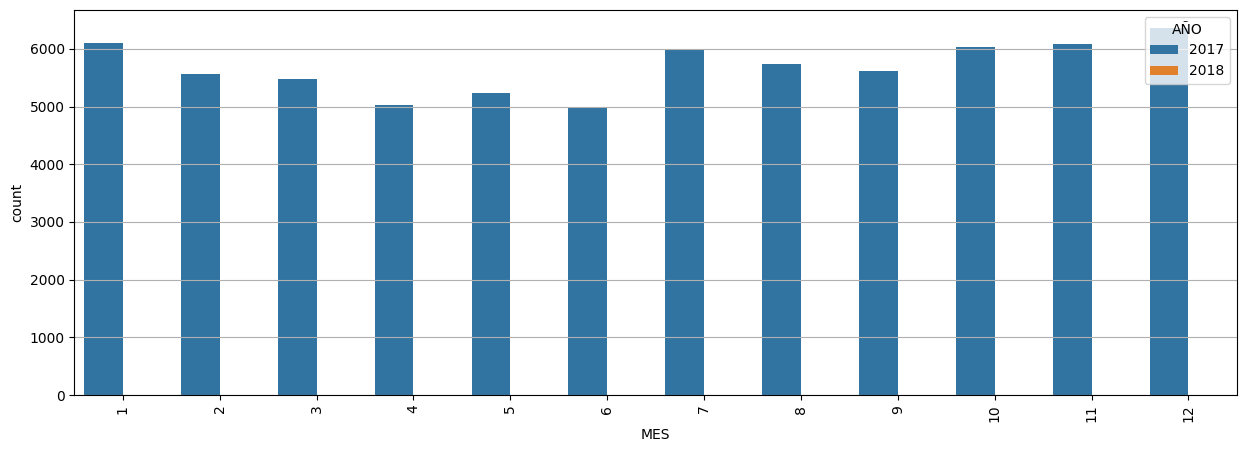

In [135]:
plt.figure(figsize=(15,5))
sns.countplot(
    data=flight_delay_data,
    x='MES',
    hue='AÑO'
)
plt.xticks(rotation = 90)
plt.show()

In [136]:
flight_delay_data['AÑO'].unique()

<IntegerArray>
[2017, 2018]
Length: 2, dtype: Int16

In [137]:
flight_delay_data[flight_delay_data['AÑO']==2018]

,Fecha-I,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Ori-O,Des-O,Emp-O,DIA,MES,AÑO,DIANOM,TIPOVUELO,OPERA,SIGLAORI,SIGLADES
66918,2017-12-31 23:55:00,2,SCEL,KLAX,LAN,2018-01-01 00:02:00,2,SCEL,KLAX,LAN,1,1,2018,Lunes,I,Grupo LATAM,Santiago,Los Angeles
66947,2017-12-31 23:40:00,622,SCEL,MMMX,LAN,2018-01-01 00:12:00,622,SCEL,MMMX,LAN,1,1,2018,Lunes,I,Grupo LATAM,Santiago,Ciudad de Mexico


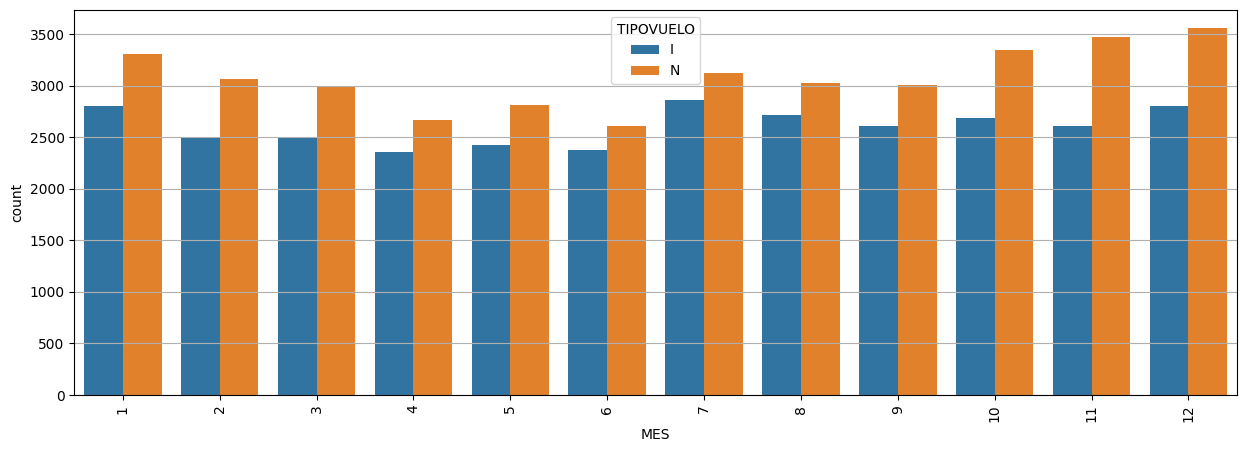

In [145]:
plt.figure(figsize=(15,5))
sns.countplot(
    data=flight_delay_data,
    x='MES',
    hue='TIPOVUELO'
)
plt.xticks(rotation = 90)
plt.show()

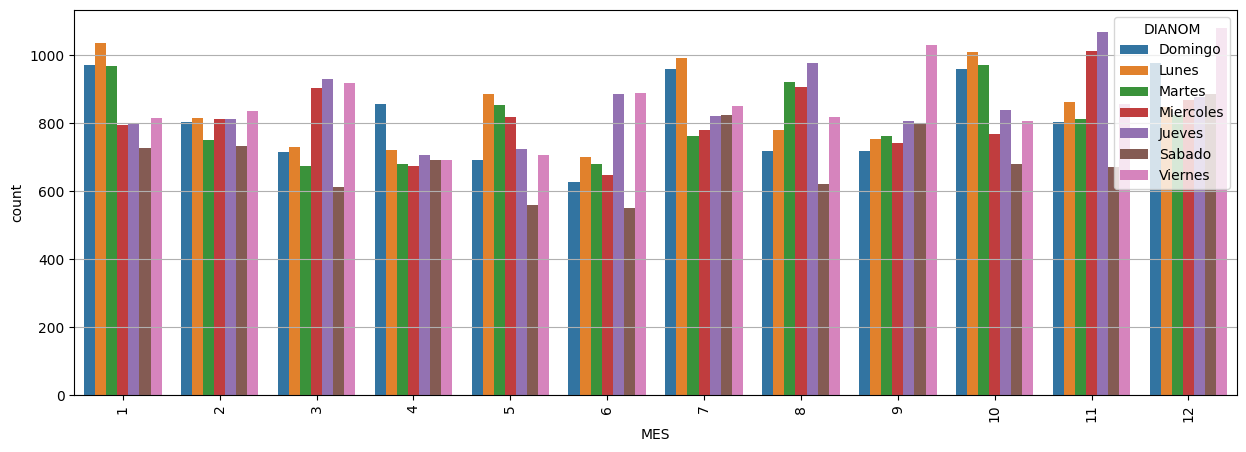

In [163]:
plt.figure(figsize=(15,5))
sns.countplot(
    data=flight_delay_data,
    x='MES',
    hue='DIANOM'
)
plt.xticks(rotation = 90)
plt.show()

### Representación de operadores

Con respecto a operadores de los vuelos presentes en el conjunto de datos, se evidencia que las aerolíneas predominantes en Santiago son LATAM y Sky Airlines.

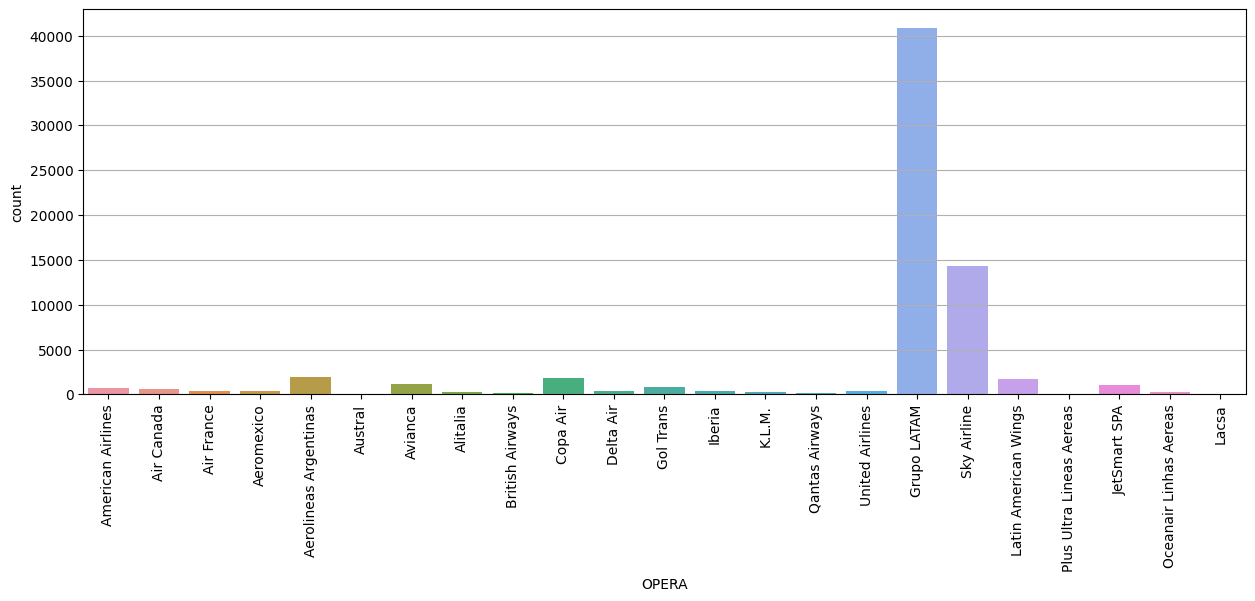

In [146]:
plt.figure(figsize=(15,5))
sns.countplot(
    data=flight_delay_data,
    x='OPERA'
)
plt.xticks(rotation = 90)
plt.show()

### Vuelos por hora.

Por último se grafica la cantidad de vuelos por hora en `Fecha-I`, donde es clara la preferencia de ciertas horas para la salida de vuelos. 

<AxesSubplot:xlabel='Fecha-I'>

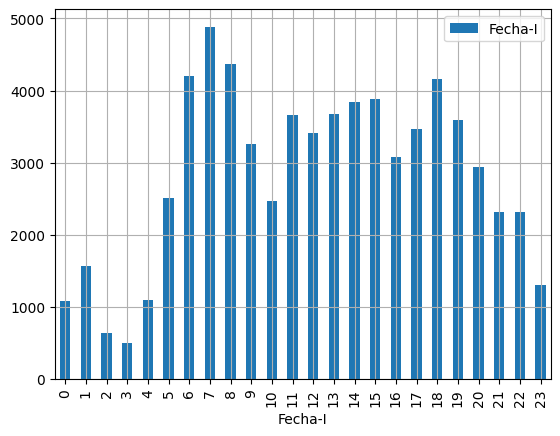

In [159]:
flight_delay_data[["Fecha-I"]].groupby(flight_delay_data["Fecha-I"].dt.hour).count().plot(kind="bar")

### Breves Observaciones

A priori, la sobrerrepresentación de ciertas compañías permite enunciar que los resultados que se den en cuanto retrasos de vuelos tendrían un sesgo con respecto a gestiones operativas y políticas de la compañía. Esto sin considerar factores aleatorios o no propios de aerolíneas como clima, congestión de aeropuertos de destino, entre otras. 

Por otro lado, variables como la cantidad de vuelos por hora o meses de mayor congestión pueden tener incidencia en qué tan propenso es un vuelo a ser retrasado, pues no son variables uniformes en sus posibles valores. Esto se determinará en fases posteriores.

Por último, al haber encontrado diferencias entre el areopuerto planificado de aterrizaje y el que realmente fue utilizado, se podía indagar en mayor profundidad sobre variables que puedan influir en esta decisión, por ejemplo, pronósticos del clima en aeropuertos de destino o de origen que sean desfavorables o que no permitan el aterrizaje/despegue.

## 2. Generación de Variables

En esta sección de generan las variables propuestas en el enunciado. 
> Para la variable `temporada_alta` se considerará las 00:00 del día anterior y siguiente a los intervalos que se especifican para poder realizar el filtro.

In [165]:
# Define separate conditions for each requested period for 'temporada alta'
jan_to_march_cond = (flight_delay_data['Fecha-I'] < datetime(2017, 3, 4))
jul_cond = ((flight_delay_data['Fecha-I'] > datetime(2017, 7, 15)) & (flight_delay_data['Fecha-I'] < datetime(2017, 8, 1)))
sept_cond = ((flight_delay_data['Fecha-I'] > datetime(2017, 9, 11)) & (flight_delay_data['Fecha-I'] < datetime(2017, 9, 30)))
dic_cond = (flight_delay_data['Fecha-I'] > datetime(2017, 12, 15))

In [173]:
# Define temporada_alta
flight_delay_data['temporada_alta'] = (jan_to_march_cond | jul_cond | sept_cond | dic_cond).astype('Int8')

In [177]:
# Quick check if the column was built correctly.
display(flight_delay_data[(flight_delay_data['Fecha-I'] < datetime(2017, 3, 15)) & (flight_delay_data['Fecha-I'] > datetime(2017, 2, 25))].head())
flight_delay_data[(flight_delay_data['Fecha-I'] < datetime(2017, 3, 15)) & (flight_delay_data['Fecha-I'] > datetime(2017, 2, 25))].tail()

,Fecha-I,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Ori-O,Des-O,Emp-O,DIA,MES,AÑO,DIANOM,TIPOVUELO,OPERA,SIGLAORI,SIGLADES,temporada_alta
6116,2017-02-25 23:30:00,226,SCEL,KMIA,AAL,2017-02-26 00:49:00,226,SCEL,KMIA,AAL,26,2,2017,Domingo,I,American Airlines,Santiago,Miami,1
6117,2017-02-27 23:30:00,226,SCEL,KMIA,AAL,2017-02-27 23:20:00,226,SCEL,KMIA,AAL,27,2,2017,Lunes,I,American Airlines,Santiago,Miami,1
6141,2017-02-25 22:00:00,912,SCEL,KMIA,AAL,2017-02-25 21:51:00,912,SCEL,KMIA,AAL,25,2,2017,Sabado,I,American Airlines,Santiago,Miami,1
6142,2017-02-26 22:00:00,912,SCEL,KMIA,AAL,2017-02-27 00:40:00,912,SCEL,KMIA,AAL,27,2,2017,Lunes,I,American Airlines,Santiago,Miami,1
6143,2017-02-27 22:00:00,912,SCEL,KMIA,AAL,2017-02-27 21:58:00,912,SCEL,KMIA,AAL,27,2,2017,Lunes,I,American Airlines,Santiago,Miami,1


,Fecha-I,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Ori-O,Des-O,Emp-O,DIA,MES,AÑO,DIANOM,TIPOVUELO,OPERA,SIGLAORI,SIGLADES,temporada_alta
17116,2017-03-14 06:30:00,41,SCEL,SCIE,JMR,2017-03-14 06:32:00,41,SCEL,SCIE,JMR,14,3,2017,Martes,N,Latin American Wings,Santiago,Concepcion,0
17130,2017-03-13 18:00:00,43,SCEL,SCIE,JMR,2017-03-13 17:57:00,43,SCEL,SCIE,JMR,13,3,2017,Lunes,N,Latin American Wings,Santiago,Concepcion,0
17131,2017-03-14 18:00:00,43,SCEL,SCIE,JMR,2017-03-14 17:55:00,43,SCEL,SCIE,JMR,14,3,2017,Martes,N,Latin American Wings,Santiago,Concepcion,0
17147,2017-03-02 16:00:00,10,SCEL,SCCF,JMR,2017-03-02 16:14:00,10,SCEL,SCCF,JMR,2,3,2017,Jueves,N,Latin American Wings,Santiago,Calama,1
17148,2017-03-07 16:00:00,10,SCEL,SCCF,JMR,2017-03-07 15:46:00,10,SCEL,SCCF,JMR,7,3,2017,Martes,N,Latin American Wings,Santiago,Calama,0


In [184]:
# Define dif_min
flight_delay_data['dif_min'] = (flight_delay_data['Fecha-O'] - flight_delay_data['Fecha-I']).dt.total_seconds()/60

In [188]:
flight_delay_data['dif_min'].head(10)

0     3.0
1     9.0
2     9.0
3     3.0
4    -2.0
5    34.0
6    -5.0
7    -5.0
8    40.0
9    69.0
Name: dif_min, dtype: float64

In [191]:
# Define atraso_15
flight_delay_data['atraso_15'] = (flight_delay_data['dif_min'] > 15).astype('Int8')
flight_delay_data['atraso_15'].head(10)

0    0
1    0
2    0
3    0
4    0
5    1
6    0
7    0
8    1
9    1
Name: atraso_15, dtype: Int8

In [219]:
# Sequentialy add values mañana, tarde y noche.
morning_condition = (flight_delay_data['Fecha-I'].dt.hour > 4) & (flight_delay_data['Fecha-I'].dt.hour < 12)
flight_delay_data['periodo_dia'] = morning_condition.replace({True: "mañana"}).copy()

afternoon_condition = (flight_delay_data['Fecha-I'].dt.hour > 11) & (flight_delay_data['Fecha-I'].dt.hour < 19)
flight_delay_data['periodo_dia'].loc[afternoon_condition] = afternoon_condition.replace({True: "tarde"}).copy()

night_condition = (flight_delay_data['Fecha-I'].dt.hour > 18) | (flight_delay_data['Fecha-I'].dt.hour < 5)
flight_delay_data['periodo_dia'].loc[night_condition] = night_condition.replace({True: "noche"}).copy()

flight_delay_data['periodo_dia'].unique()

/home/alonso/Desktop/Postulación IBM/Data-Scientist-Challenge-LATAM/data_scientist_challenge_env/lib/python3.8/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/home/alonso/Desktop/Postulación IBM/Data-Scientist-Challenge-LATAM/data_scientist_challenge_env/lib/python3.8/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


array(['noche', 'tarde', 'mañana'], dtype=object)

In [218]:
display(flight_delay_data[morning_condition].head())
display(flight_delay_data[afternoon_condition].iloc[10000:10005])
display(flight_delay_data[night_condition].head())

,Fecha-I,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Ori-O,Des-O,Emp-O,...,AÑO,DIANOM,TIPOVUELO,OPERA,SIGLAORI,SIGLADES,temporada_alta,dif_min,atraso_15,periodo_dia
201,2017-01-01 10:35:00,1281,SCEL,SABE,ARG,2017-01-01 10:25:00,1281,SCEL,SABE,ARG,...,2017,Domingo,I,Aerolineas Argentinas,Santiago,Buenos Aires,1,-10.0,0,mañana
202,2017-01-02 10:35:00,1281,SCEL,SABE,ARG,2017-01-02 10:37:00,1281,SCEL,SABE,ARG,...,2017,Lunes,I,Aerolineas Argentinas,Santiago,Buenos Aires,1,2.0,0,mañana
203,2017-01-03 10:35:00,1281,SCEL,SABE,ARG,2017-01-03 10:33:00,1281,SCEL,SABE,ARG,...,2017,Martes,I,Aerolineas Argentinas,Santiago,Buenos Aires,1,-2.0,0,mañana
204,2017-01-04 10:35:00,1281,SCEL,SABE,ARG,2017-01-04 11:06:00,1281,SCEL,SABE,ARG,...,2017,Miercoles,I,Aerolineas Argentinas,Santiago,Buenos Aires,1,31.0,1,mañana
205,2017-01-05 10:35:00,1281,SCEL,SABE,ARG,2017-01-05 10:53:00,1281,SCEL,SABE,ARG,...,2017,Jueves,I,Aerolineas Argentinas,Santiago,Buenos Aires,1,18.0,1,mañana


,Fecha-I,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Ori-O,Des-O,Emp-O,...,AÑO,DIANOM,TIPOVUELO,OPERA,SIGLAORI,SIGLADES,temporada_alta,dif_min,atraso_15,periodo_dia
26995,2017-05-22 17:50:00,833,SCEL,SCIP,LAN,2017-05-22 17:55:00,833,SCEL,SCIP,LAN,...,2017,Lunes,N,Grupo LATAM,Santiago,Isla de Pascua,0,5.0,0,tarde
26996,2017-05-29 17:50:00,833,SCEL,SCIP,LAN,2017-05-29 18:03:00,833,SCEL,SCIP,LAN,...,2017,Lunes,N,Grupo LATAM,Santiago,Isla de Pascua,0,13.0,0,tarde
27038,2017-05-06 12:00:00,888,SCEL,SCDA,LAN,2017-05-06 11:55:00,888,SCEL,SCDA,LAN,...,2017,Sabado,N,Grupo LATAM,Santiago,Iquique,0,-5.0,0,tarde
27039,2017-05-13 12:00:00,888,SCEL,SCDA,LAN,2017-05-13 12:02:00,888,SCEL,SCDA,LAN,...,2017,Sabado,N,Grupo LATAM,Santiago,Iquique,0,2.0,0,tarde
27040,2017-05-20 12:00:00,888,SCEL,SCDA,LAN,2017-05-20 12:29:00,888,SCEL,SCDA,LAN,...,2017,Sabado,N,Grupo LATAM,Santiago,Iquique,0,29.0,1,tarde


,Fecha-I,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Ori-O,Des-O,Emp-O,...,AÑO,DIANOM,TIPOVUELO,OPERA,SIGLAORI,SIGLADES,temporada_alta,dif_min,atraso_15,periodo_dia
0,2017-01-01 23:30:00,226,SCEL,KMIA,AAL,2017-01-01 23:33:00,226,SCEL,KMIA,AAL,...,2017,Domingo,I,American Airlines,Santiago,Miami,1,3.0,0,noche
1,2017-01-02 23:30:00,226,SCEL,KMIA,AAL,2017-01-02 23:39:00,226,SCEL,KMIA,AAL,...,2017,Lunes,I,American Airlines,Santiago,Miami,1,9.0,0,noche
2,2017-01-03 23:30:00,226,SCEL,KMIA,AAL,2017-01-03 23:39:00,226,SCEL,KMIA,AAL,...,2017,Martes,I,American Airlines,Santiago,Miami,1,9.0,0,noche
3,2017-01-04 23:30:00,226,SCEL,KMIA,AAL,2017-01-04 23:33:00,226,SCEL,KMIA,AAL,...,2017,Miercoles,I,American Airlines,Santiago,Miami,1,3.0,0,noche
4,2017-01-05 23:30:00,226,SCEL,KMIA,AAL,2017-01-05 23:28:00,226,SCEL,KMIA,AAL,...,2017,Jueves,I,American Airlines,Santiago,Miami,1,-2.0,0,noche


In [222]:
flight_delay_data['periodo_dia'] = flight_delay_data['periodo_dia'].astype('string')

In [220]:
flight_delay_data.to_csv('Data/synthetic_features.csv', index=False)

## 3. Comparación de Tasa de Atraso por Variable

A continuación, se realizarán gráficos y cómputos para poder evidenciar diferencias en la composición de la tasa de retraso de vuelos para diferentes variables. Para ello, se asume 15 minutos como el menor valor que corresponda a un atraso de vuelo entre la hora programada y la operacional. Además, asumimos que el conjunto de datos que tenemos es representativo de los vuelos que ocurren en Santiado de Chile, es decir, las aerolíneas están bien representadas, además de no hacer falta una cantidad considerable de vuelos que sucedieron pero que no se tienen datos.

In [223]:
flight_delay_data_delayed = flight_delay_data[flight_delay_data['atraso_15'] == 1]
flight_delay_data_delayed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12614 entries, 5 to 68203
Data columns (total 22 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Fecha-I         12614 non-null  datetime64[ns]
 1   Vlo-I           12614 non-null  string        
 2   Ori-I           12614 non-null  string        
 3   Des-I           12614 non-null  string        
 4   Emp-I           12614 non-null  string        
 5   Fecha-O         12614 non-null  datetime64[ns]
 6   Vlo-O           12614 non-null  string        
 7   Ori-O           12614 non-null  string        
 8   Des-O           12614 non-null  string        
 9   Emp-O           12614 non-null  string        
 10  DIA             12614 non-null  Int8          
 11  MES             12614 non-null  Int8          
 12  AÑO             12614 non-null  Int16         
 13  DIANOM          12614 non-null  string        
 14  TIPOVUELO       12614 non-null  string        
 15  OP

### Tasa de Retraso por Destino Programado

Para realizar la descripción de tasa de retraso por destino se elige la variable `Des-I` debido a que corresponde al destino al que debiese haber llegado el vuelo. Esto debido a que antes de que un vuelo se retrase no se sabe el destino en que terminará, por lo que la información con la que se cuenta es la de destino programado.

In [339]:
def compute_delay_rate_cases(flight_delay_data, variable):
    dict_results = {}
    for var, df_var in flight_delay_data.groupby(variable):
        df_var_size = df_var.shape[0]
        for delay, delay_df in df_var.groupby("atraso_15"):
            if delay == 1:
                df_delay_size = delay_df.shape[0]
                rate_delay = df_delay_size/df_var_size
                dict_results[var] = rate_delay*100
    rate_data_var = pd.DataFrame(dict_results, index=["delay_rate"]).T
    return (rate_data_var.reset_index(level=0)).rename(columns={"index": variable})
    

In [340]:
rate_data_dest = compute_delay_rate_cases(flight_delay_data, "Des-I")

In [356]:
count_data_dest = flight_delay_data[["Des-I", "atraso_15"]].groupby("Des-I").count().reset_index(level=0).rename(columns={"atraso_15": "count"})

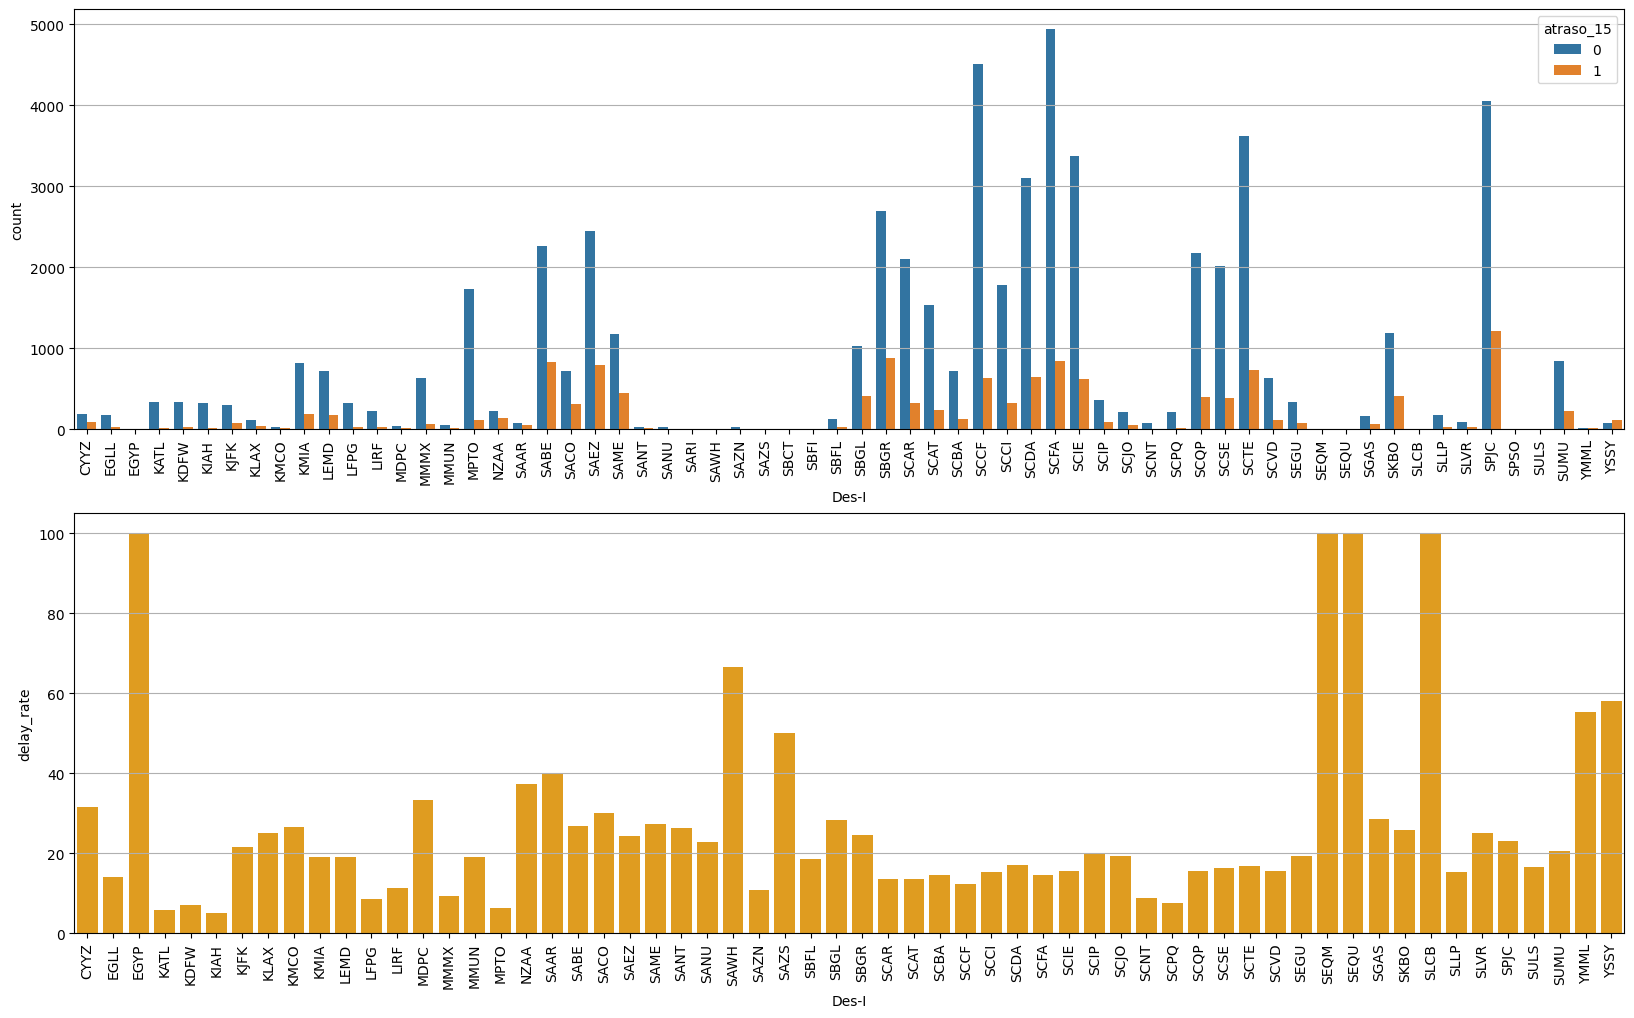

In [346]:
fig, ax = plt.subplots(2, figsize=(20,12))


sns.countplot(
    ax=ax[0],
    data=flight_delay_data.sort_values(by="Des-I"),
    x='Des-I',
    hue="atraso_15"
)

ax[0].tick_params(axis='x', rotation=90)


sns.barplot(
    ax=ax[1],
    data=rate_data_dest, 
    x='Des-I', 
    y="delay_rate",
    color="orange"
)

ax[1].tick_params(axis='x', rotation=90)



plt.show()

### Comparación Vuelos Totales por Destino vs Porcentaje de Retrasos

En el gráfico del bloque anterior, donde los ejes `x` de ambos están alineados para facilitar la comparación, se puede ver que los destinos más visitados no son aquellos con mayores tasas de retraso. Esto hace pensar que variables del tipo geográficas, tanto en distancia al destino, como potenciales dificultades ambientales u otras de las variables presentes en el connjunto de datos existente podrían dar más explicación a los atrasos por destinos debido a que la frecuencia de los viajes no evidencia una tendencia, además de existir bastante destinos con pocos datos, lo cual dificulta derivar hipótesis de estos. Lo anterior se puede ver en el gráfico del siguiente bloque donde se denotan datos ruidosos para los destinos con pocos vuelos, además de esta mencionada falta de tendencia al aumentar la cantidad de vuelos.

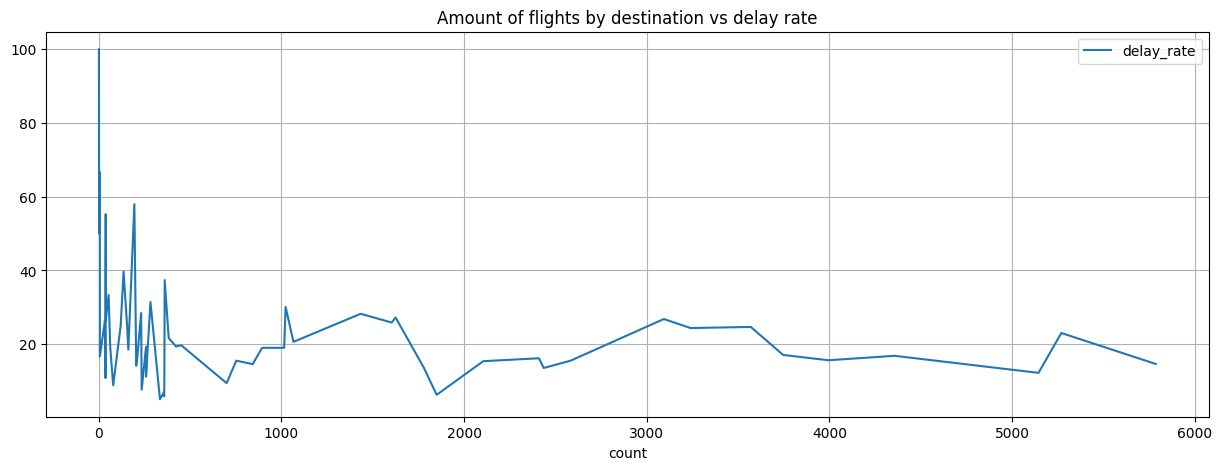

In [369]:
rate_data_dest.merge(count_data_dest, how="inner").sort_values(by="count").plot(x="count", y="delay_rate", figsize=(15,5), title= "Amount of flights by destination vs delay rate")
plt.show()

### Comparación de Distribución de Retrasos por Destino Programado

A continuación se muestran gráficas de cómo distribuyen los retrasos por destino en cuanto a magnitud. El primer gráfico muestra la comparación entre cantidad de retrasos por destino complementado por un box plot que da cuenta de ciertos estadísticos de los retrasos que componen esta cuenta. En la sección siguiente se muestran aquellos con más de 200 datos, donde se muetran histogramas de forma exponencial independiente del destino, con posibles variaciones en el parámetro que define la variable.

No se irá más lejos en este análisis para otras varianbles con el fin de priorizar análisis posteriores, sin embargo, resulta interesante ver si existen variables aleatorias o parámetros que mejor caractenicen estos comportamientos.

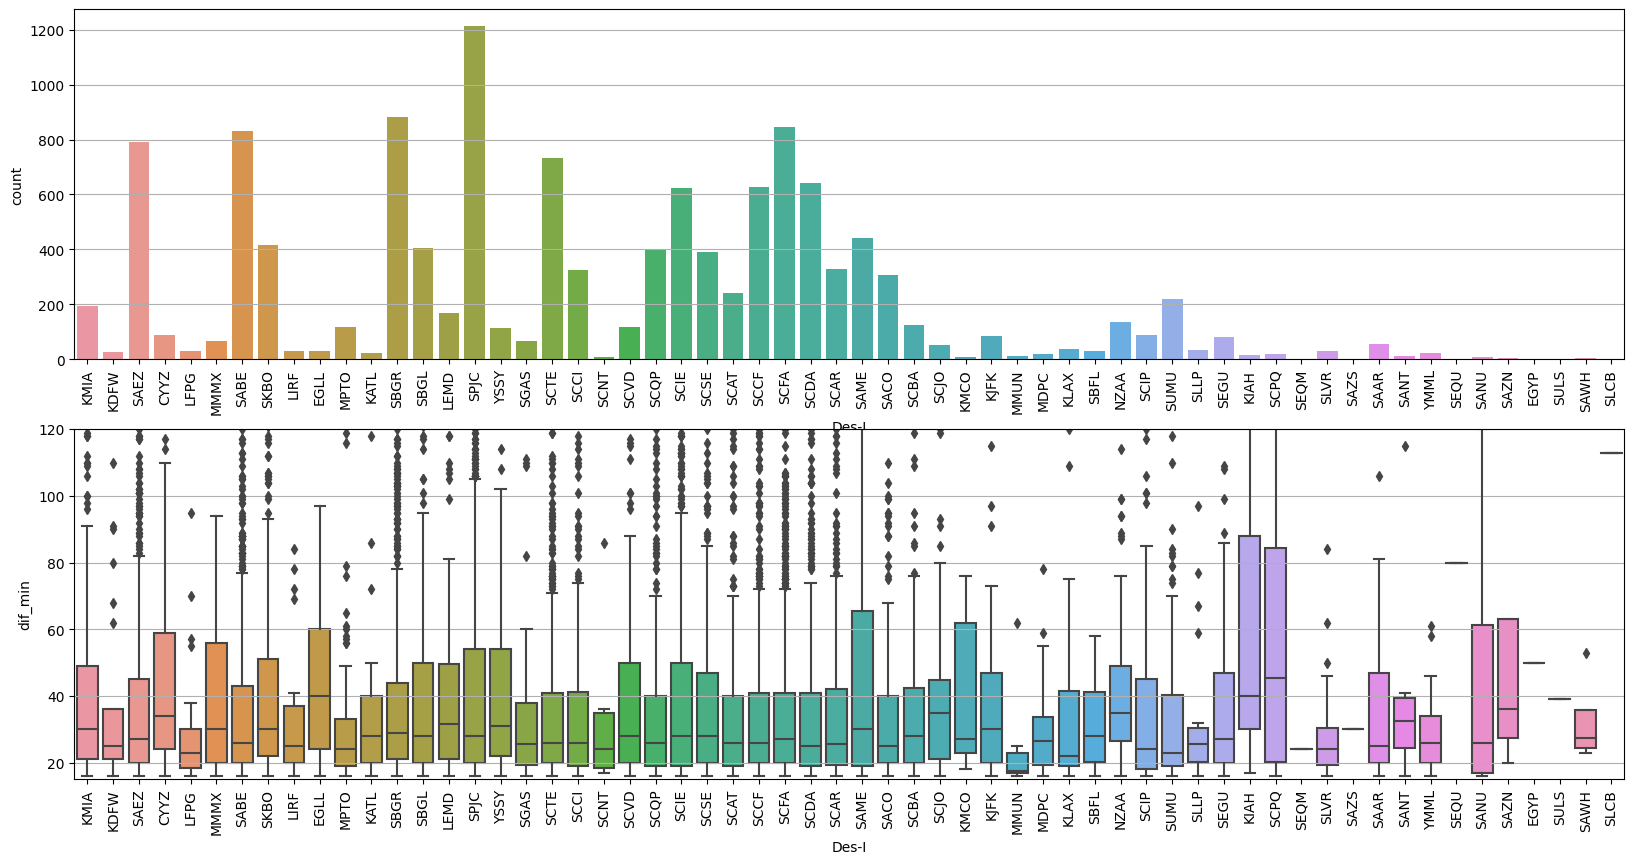

In [254]:
fig, ax = plt.subplots(2, figsize=(20,10))

sns.countplot(
    ax=ax[0],
    data=flight_delay_data_delayed,
    x="Des-I",
)

ax[0].tick_params(axis='x', rotation=90)

sns.boxplot(
    ax=ax[1],
    data=flight_delay_data_delayed,
    x="Des-I",
    y="dif_min", 
)

ax[1].tick_params(axis='x', rotation=90)
ax[1].set_ylim((15,120))

plt.show()

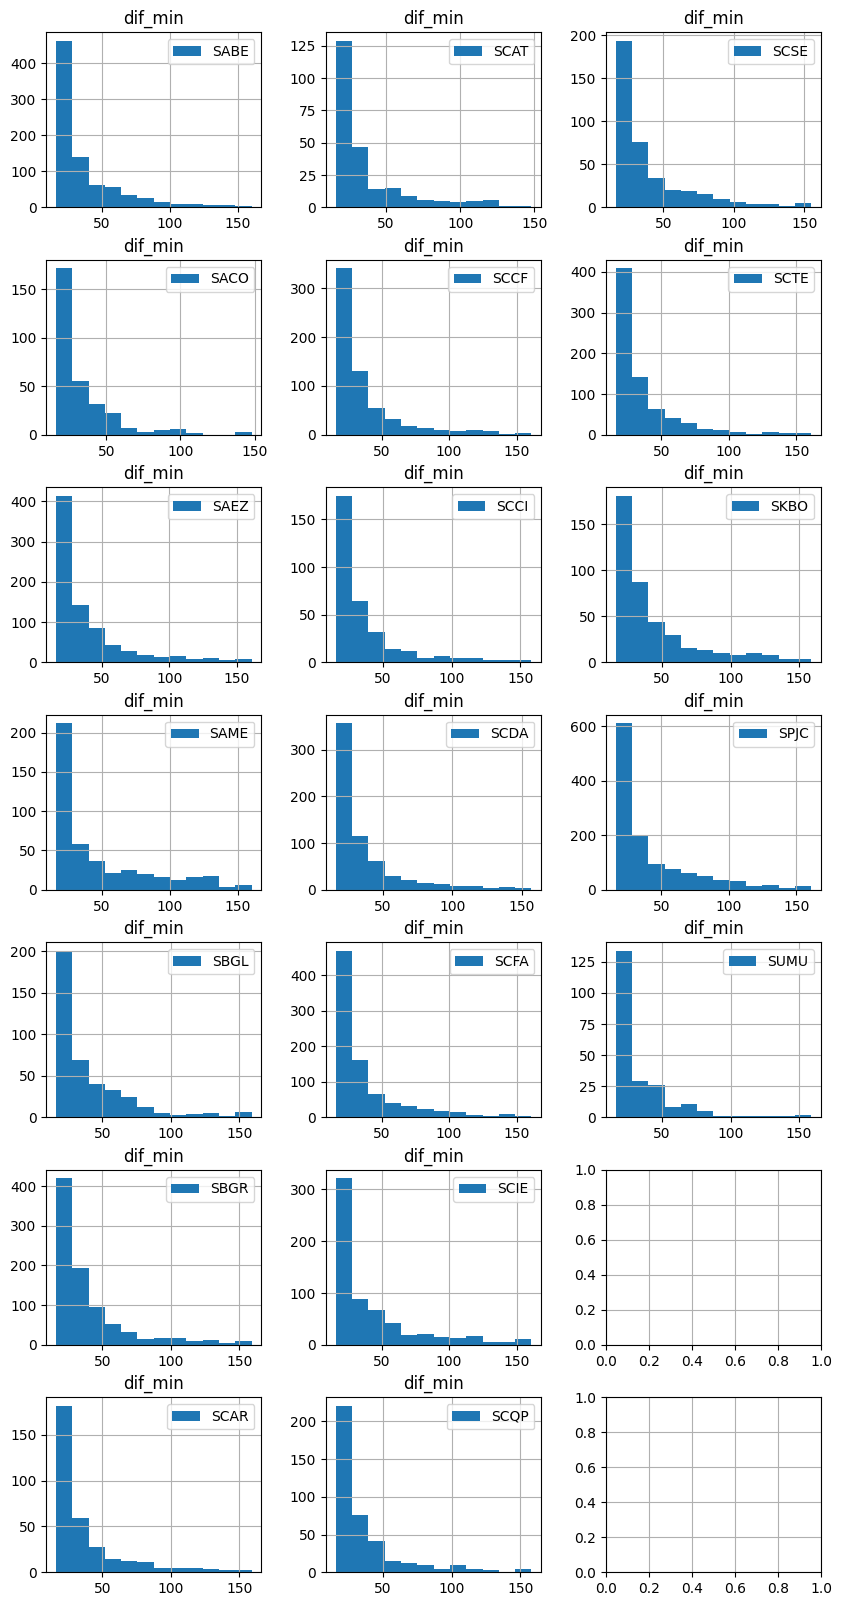

In [286]:
n = 21
fig, ax = plt.subplots(nrows=int(n/3), ncols=3 , figsize=(10,20))
i=0

for dest, dif_min_data in flight_delay_data_delayed[["Des-I", "dif_min"]].groupby("Des-I"):
    
    # Plot values with more than 200 data points
    if dif_min_data.shape[0] > 200:
        dif_min_data.hist(ax=ax[i%(n//3), i//(n//3)], bins = 12, label= dest)
        ax[i%(n//3), i//(n//3)].legend(loc="upper right")
        i = i+1
plt.show()

### Tasa de Retraso por Aerolínea

Se realizará el mismo análisis previo, siendo esta vez por aerolínea considerando la variable `OPERA`.

In [370]:
rate_data_opera = compute_delay_rate_cases(flight_delay_data, "OPERA")

In [373]:
rate_data_opera.sort_values(by="delay_rate")

,OPERA,delay_rate
1,Aeromexico,2.849003
22,United Airlines,5.074627
10,Delta Air,5.865922
9,Copa Air,6.270270
5,American Airlines,6.737120
15,K.L.M.,8.366534
3,Air France,8.379888
13,Iberia,9.944751
4,Alitalia,11.196911
16,Lacsa,11.956522


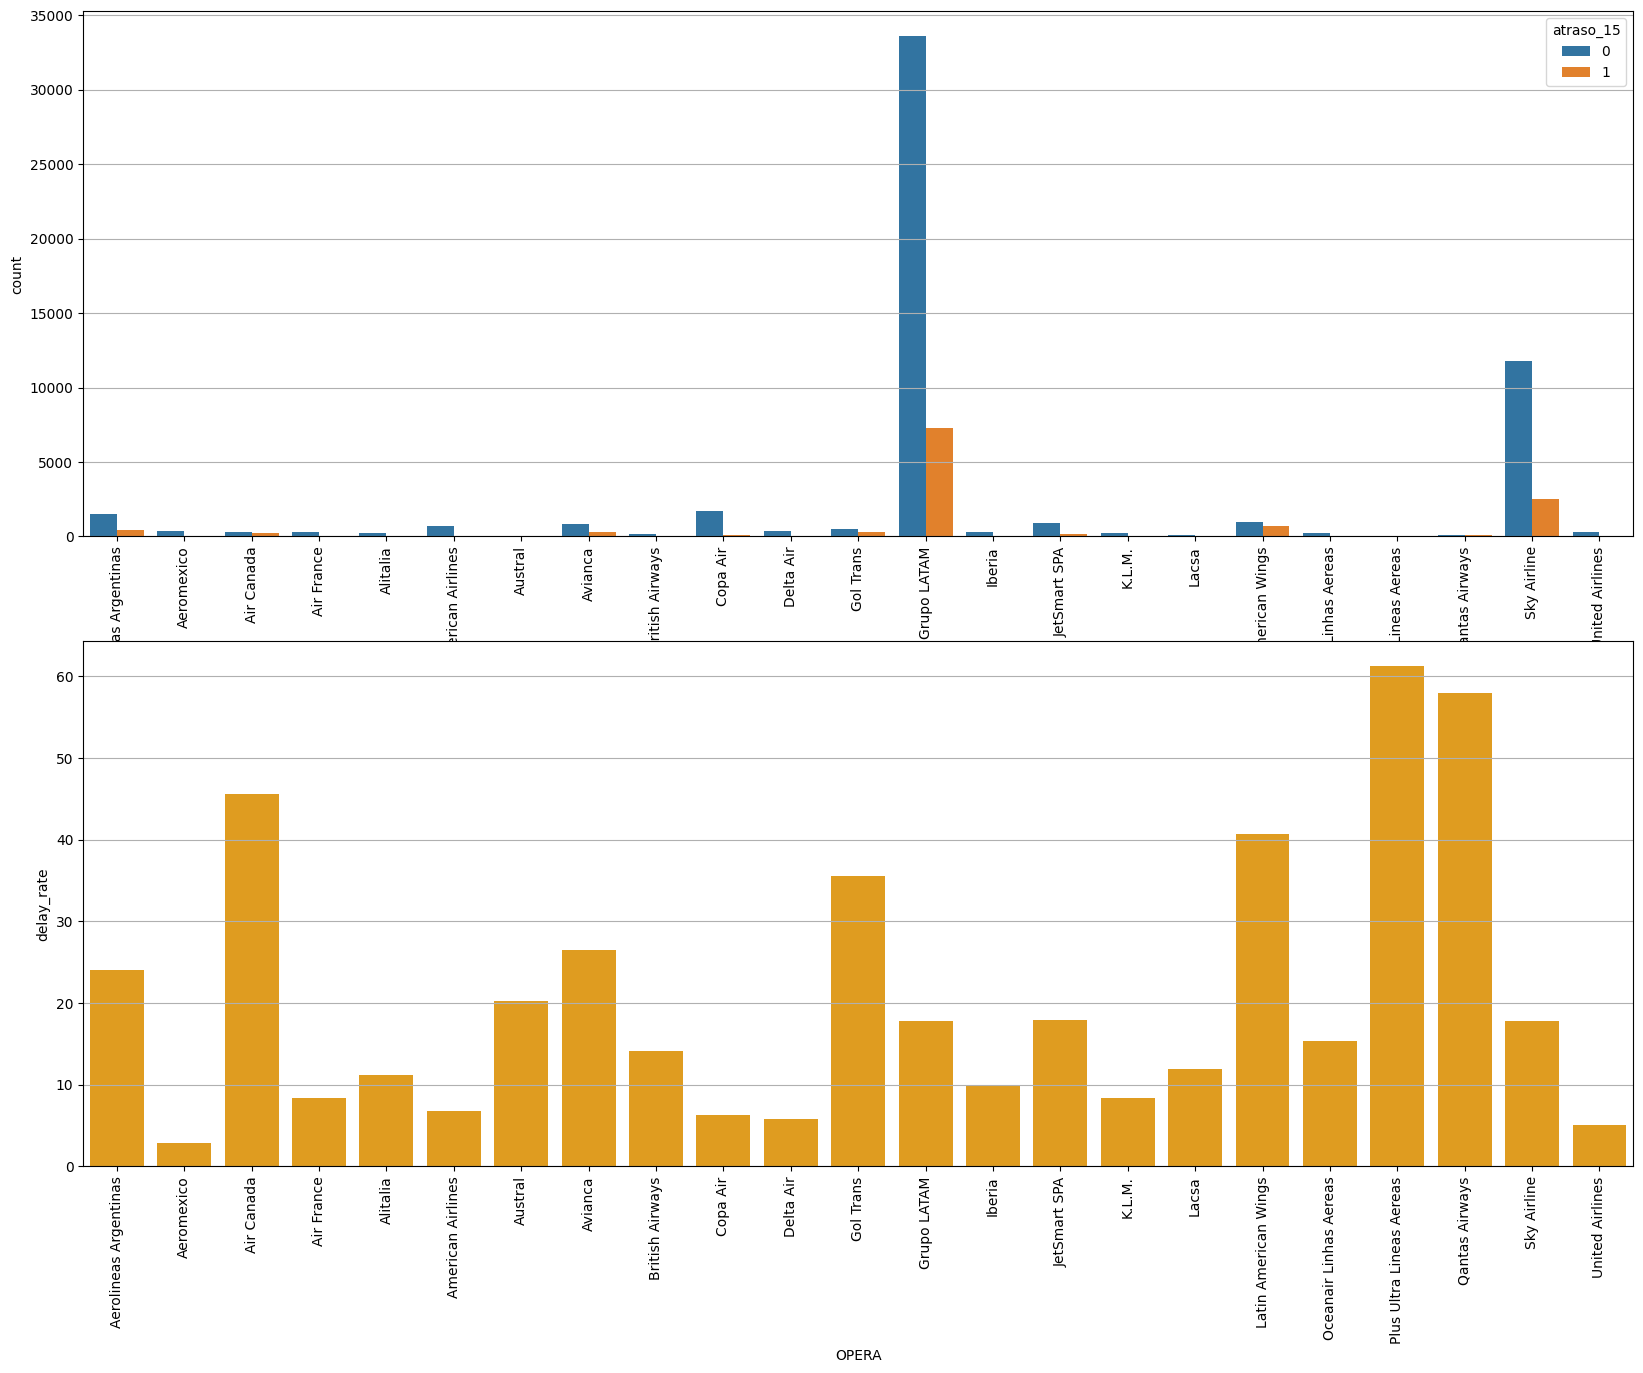

In [379]:
fig, ax = plt.subplots(2, figsize=(20,15))
variable = "OPERA"


sns.countplot(
    ax=ax[0],
    data=flight_delay_data.sort_values(by="OPERA"),
    x="OPERA",
    hue="atraso_15"
)

ax[0].tick_params(axis='x', rotation=90)


sns.barplot(
    ax=ax[1],
    data=rate_data_opera, 
    x="OPERA", 
    y="delay_rate",
    color="orange"
)

ax[1].tick_params(axis='x', rotation=90)



plt.show()

### Comparación de Tasa de Atraso por Aerolínea

Como se puede ver en el gráfico anterior, se tiene un grupo de 5 aerolíneas que presentan la mayor tasa de atrasos por vuelos ejecutados, sin embargo, estas no son las más representativas de la muestra que, como se mencionó previamente, son LATAM y Ski Airlines. Tampoco se evidencia correlación entre cantidad de vuelos y tasa de retraso.

### Tasa de Retraso por Mes del Año

In [380]:
rate_data_monthly = compute_delay_rate_cases(flight_delay_data, "MES")
rate_data_monthly

,MES,delay_rate
0,1,16.011788
1,2,15.159144
2,3,11.510398
3,4,11.653386
4,5,15.782443
5,6,17.104999
6,7,29.339119
7,8,17.339833
8,9,17.237077
9,10,22.596154


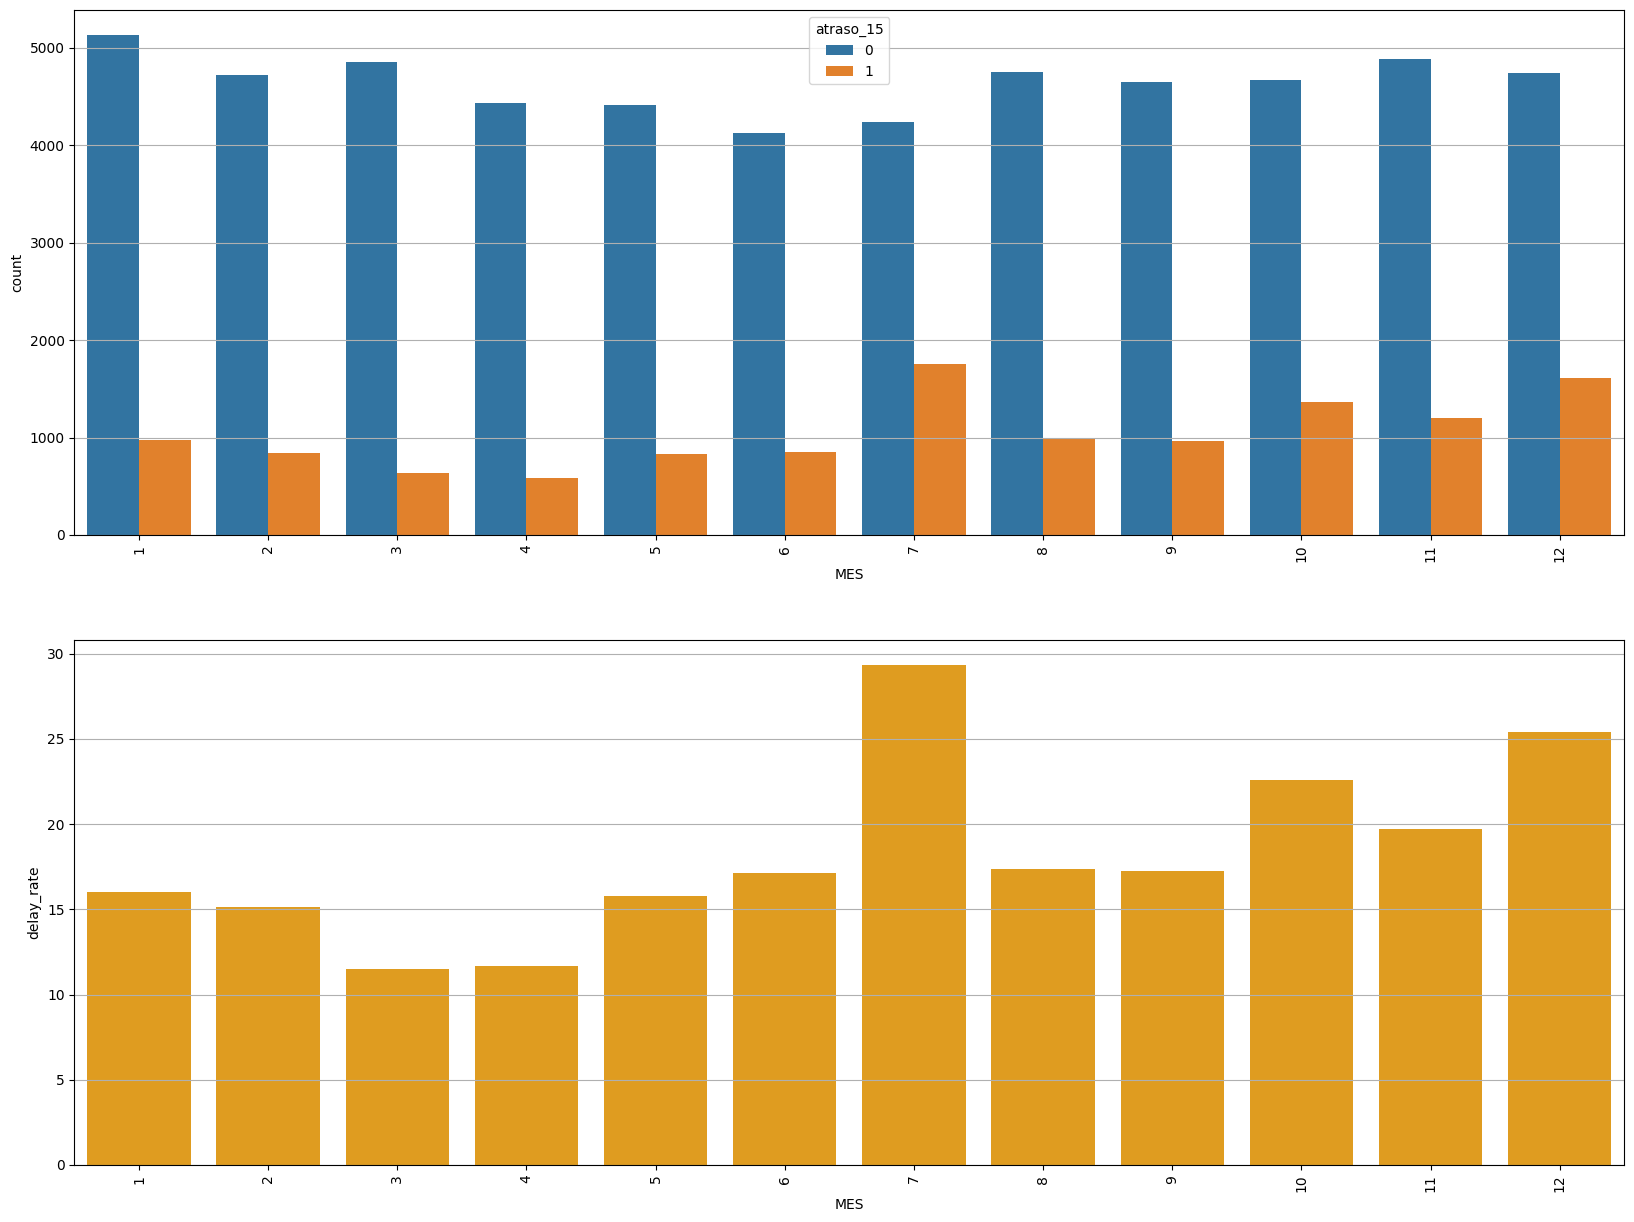

In [381]:
fig, ax = plt.subplots(2, figsize=(20,15))
variable = "MES"


sns.countplot(
    ax=ax[0],
    data=flight_delay_data.sort_values(by="MES"),
    x="MES",
    hue="atraso_15"
)

ax[0].tick_params(axis='x', rotation=90)


sns.barplot(
    ax=ax[1],
    data=rate_data_monthly, 
    x="MES", 
    y="delay_rate",
    color="orange"
)

ax[1].tick_params(axis='x', rotation=90)



plt.show()

In [382]:
count_data_monthly = flight_delay_data[["MES", "atraso_15"]].groupby("MES").count().reset_index(level=0).rename(columns={"atraso_15": "count"})

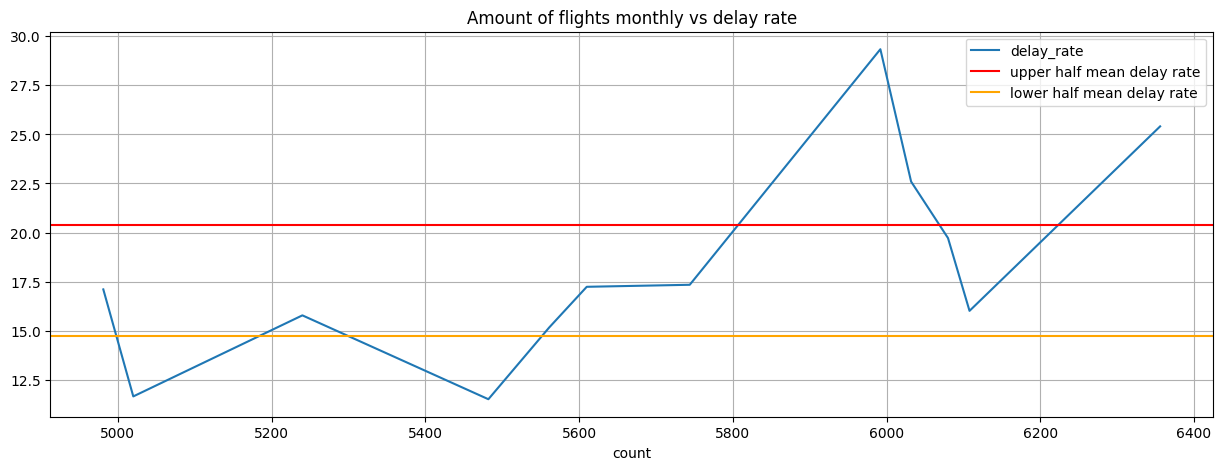

In [398]:
rate_data_monthly.merge(count_data_monthly, how="inner").sort_values(by="count").plot(x="count", y="delay_rate", figsize=(15,5), title= "Amount of flights monthly vs delay rate")
plt.axhline(y=mean_rate_uh, color='r', linestyle='-', label = "upper half mean delay rate")
plt.axhline(y=mean_rate_lh, color='orange', linestyle='-', label = "lower half mean delay rate")
plt.legend()
plt.show()

In [393]:
mean_rate_uh = rate_data_monthly.merge(count_data_monthly, how="inner").sort_values(by="count").iloc[5:-1].delay_rate.mean()
print("Upper half mean delay rate: ", mean_rate_uh)

Upper half mean delay rate:  20.374060790878612


In [394]:
mean_rate_lh= rate_data_monthly.merge(count_data_monthly, how="inner").sort_values(by="count").iloc[:6].delay_rate.mean()
print("Lower half mean delay rate: ", mean_rate_lh)

Lower half mean delay rate:  14.741241091871565


In [395]:
rate_data_monthly.merge(count_data_monthly, how="inner").sort_values(by="count")

,MES,delay_rate,count
5,6,17.104999,4981
3,4,11.653386,5020
4,5,15.782443,5240
2,3,11.510398,5482
1,2,15.159144,5561
8,9,17.237077,5610
7,8,17.339833,5744
6,7,29.339119,5992
9,10,22.596154,6032
10,11,19.720395,6080


### Comparación Tasa de Retraso por Mes del Año

Opuesto a los resultados que se venían viendo, en este gráfico, si bien no se puede concluir una correlación lineal entre cantidad de vuelos por mes y tasa de retraso, sí se puede ver que en la mitad de meses con mayor cantidad de vuelos el promedio de tasa de atraso sube considerablemente con respecto a la mitad inferior, donde ningún mes de la mitad superior queda por debajo del promedio de la mitad inferior.

Por otro lado, dado que la ciudad de Origen es Santiago de Chile, se podría indagar en la correlación que existe entre que Julio sea un mes de lluvias/nieves en la cordillera con este valor de tasa de retraso que sobresale de entre el resto de los meses.

### Tasa de Retraso por Día de Semana

In [399]:
rate_data_daily = compute_delay_rate_cases(flight_delay_data, "DIANOM")
rate_data_daily

,DIANOM,delay_rate
0,Domingo,16.108616
1,Jueves,19.949273
2,Lunes,20.215181
3,Martes,16.911613
4,Miercoles,17.084962
5,Sabado,16.319444
6,Viernes,22.201710


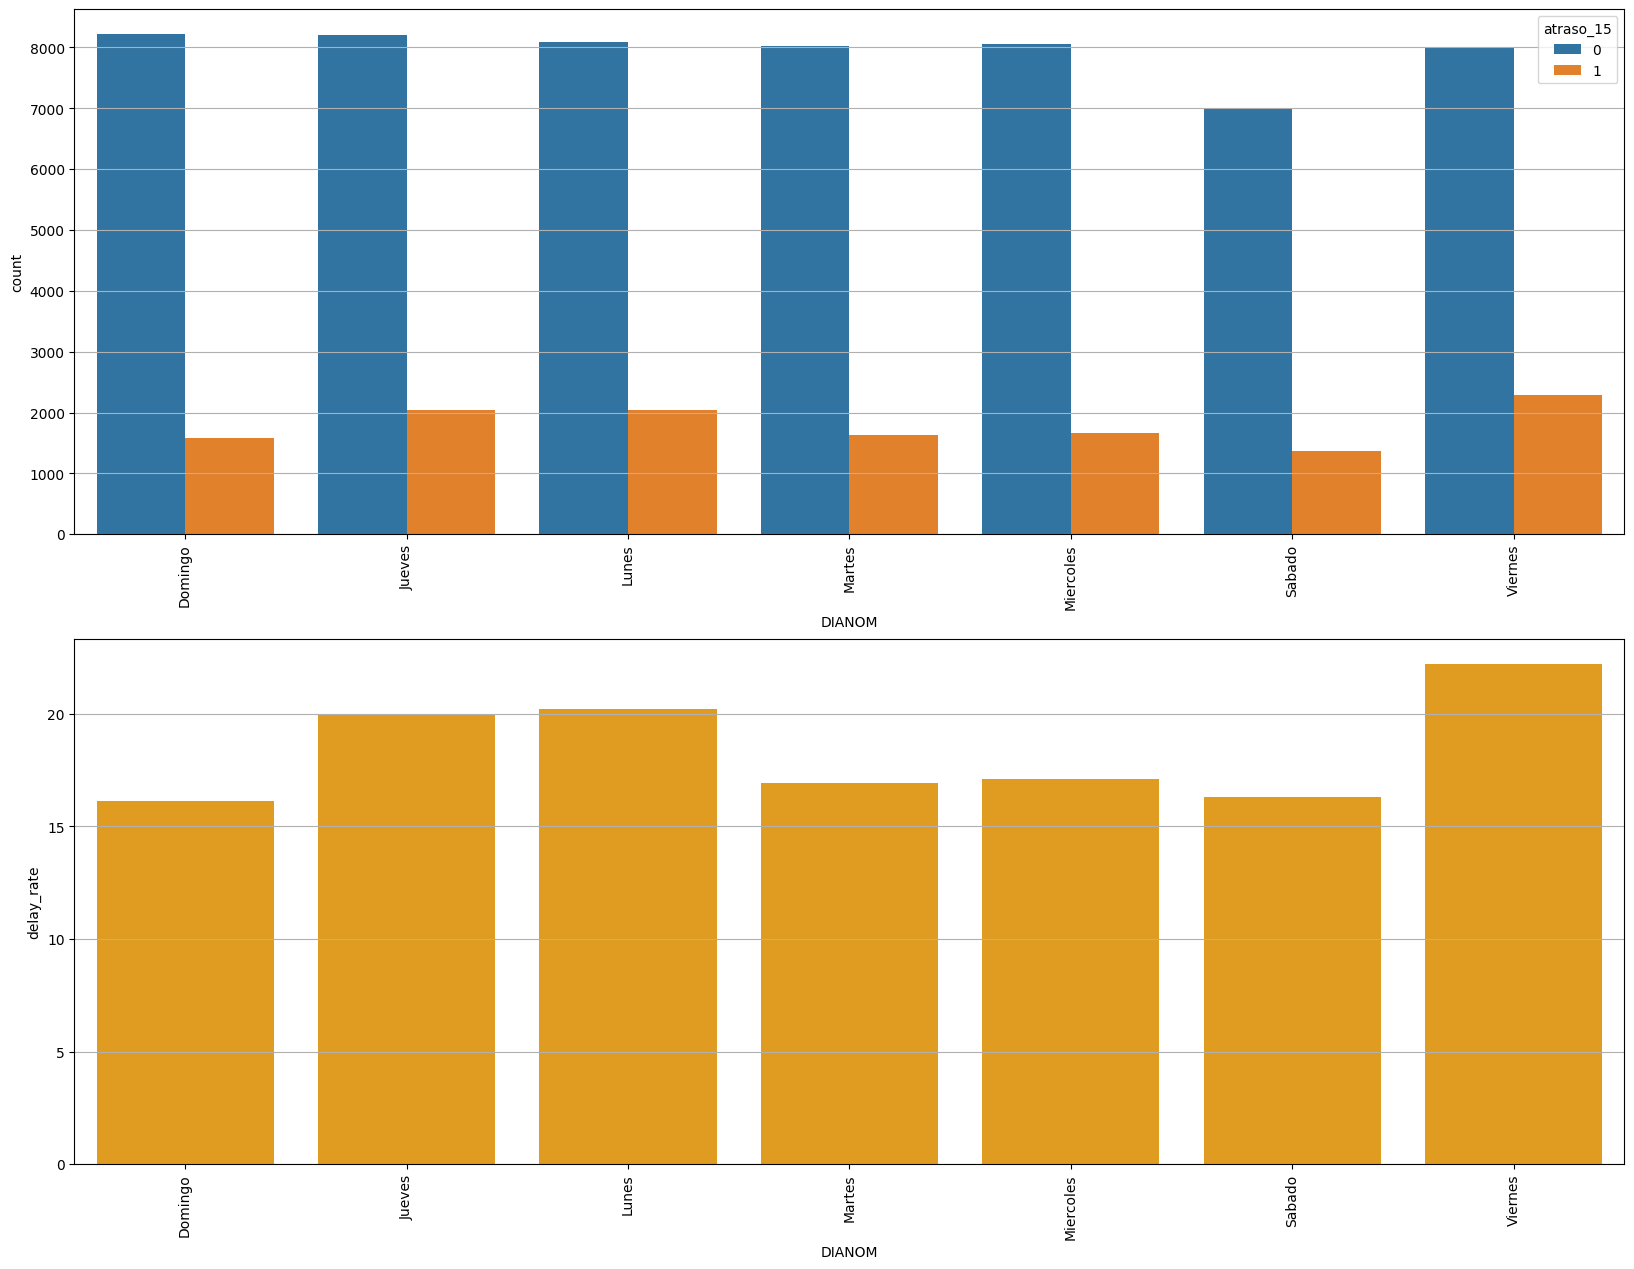

In [400]:
fig, ax = plt.subplots(2, figsize=(20,15))
variable = "DIANOM"


sns.countplot(
    ax=ax[0],
    data=flight_delay_data.sort_values(by="DIANOM"),
    x="DIANOM",
    hue="atraso_15"
)

ax[0].tick_params(axis='x', rotation=90)


sns.barplot(
    ax=ax[1],
    data=rate_data_daily, 
    x="DIANOM", 
    y="delay_rate",
    color="orange"
)

ax[1].tick_params(axis='x', rotation=90)



plt.show()

In [401]:
count_data_daily = flight_delay_data[["DIANOM", "atraso_15"]].groupby("DIANOM").count().reset_index(level=0).rename(columns={"atraso_15": "count"})

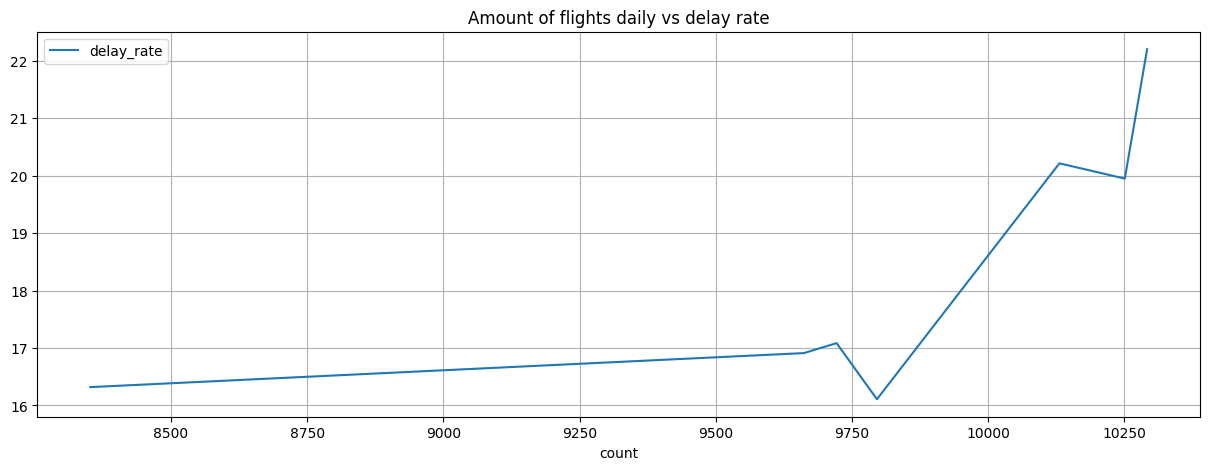

In [402]:
rate_data_daily.merge(count_data_daily, how="inner").sort_values(by="count").plot(x="count", y="delay_rate", figsize=(15,5), title= "Amount of flights daily vs delay rate")
#plt.axhline(y=mean_rate_uh, color='r', linestyle='-', label = "upper half mean delay rate")
#plt.axhline(y=mean_rate_lh, color='orange', linestyle='-', label = "lower half mean delay rate")
plt.legend()
plt.show()

In [403]:
rate_data_daily.merge(count_data_daily, how="inner").sort_values(by="count")

,DIANOM,delay_rate,count
5,Sabado,16.319444,8352
3,Martes,16.911613,9662
4,Miercoles,17.084962,9722
0,Domingo,16.108616,9796
2,Lunes,20.215181,10131
1,Jueves,19.949273,10251
6,Viernes,22.201710,10292


### Comparación Tasa de Retraso por Día de Semana

La descripción que se puede dar respecto a esta variable es similar a la dada anteriormente para los meses, sin embargo, se espera que la desagregación por meses de estos días y otras variables que ayuden a complementar este indicio de que hay días más propensos a presentar retrasos que otros, puesto que la magnitud de la tasa más alta del grupo no se diferencia tanto del resto como si lo hace la agregación por meses; por ejemplo, el máximo de tasa para la agregación por días es el día Viernes con 22%, mientras que el mes con mayor tasa de retraso es Julio con un casi 30%. Ocurre de la misma forma con el mínimo, por lo que esta variación más acotada la hace menos interesante por sí sola, pero potencialmente informativa de todas formas.

### Tasa de Retraso por Periodo del Día

Para las siguientes variables resulta suficiente con ver los datos en tablas debido a las pocas categorías y a que las conclusiones que se pueden sacar, por lo mismo, no difieren sin visualización.

In [409]:
rate_data_day_cycle = compute_delay_rate_cases(flight_delay_data, "periodo_dia")

In [410]:
count_data_day_cycle = flight_delay_data[["periodo_dia", "atraso_15"]].groupby("periodo_dia").count().reset_index(level=0).rename(columns={"atraso_15": "count"})

In [411]:
rate_data_day_cycle.merge(count_data_day_cycle, how="inner").sort_values(by="count")

,periodo_dia,delay_rate,count
1,noche,20.002306,17348
0,mañana,16.006627,25352
2,tarde,19.940406,25506


### Comparación Tasa de Retraso por Periodo del Día

Como se puede ver en la tabla del bloque superior, el valor `noche` presenta el valor más alto de tasa de retraso, seguido de `tarde` y luego por `mañana`. En este caso, no se puede saber si una cuenta mayor de vuelos corresponde a mayor congestión, debido a que no se sabe si hay una cantidad mayor o menor de personal en ciertos horarios del aeropuerto, por lo que se verá posteriormente si esta variable resulta informativa para modelos para predecir retraso.

### Tasa de Retraso por Temporada

In [414]:
rate_data_seasonal = compute_delay_rate_cases(flight_delay_data, "temporada_alta")

In [412]:
count_data_seasonal = flight_delay_data[["temporada_alta", "atraso_15"]].groupby("temporada_alta").count().reset_index(level=0).rename(columns={"atraso_15": "count"})

In [413]:
rate_data_seasonal.merge(count_data_seasonal, how="inner").sort_values(by="count")

,temporada_alta,delay_rate,count
1,1,19.657552,22602
0,0,17.917288,45604


### Comparación Tasa de Retraso por Temporada

Este resultado se condice con lo esperado, pues un periodo corto del año concentra mayor tasa de retraso que el resto del mismo. Si bien la diferencia no es de una gran magnitud, puede resultar útil al combinarse con otras variables para explicar retrasos.

### Tasa de Retraso por Tipo de Vuelo

In [417]:
rate_data_flight_type = compute_delay_rate_cases(flight_delay_data, "TIPOVUELO")

In [415]:
count_data_flight_type = flight_delay_data[["TIPOVUELO", "atraso_15"]].groupby("TIPOVUELO").count().reset_index(level=0).rename(columns={"atraso_15": "count"})

In [416]:
rate_data_flight_type.merge(count_data_flight_type, how="inner").sort_values(by="count")

,TIPOVUELO,delay_rate,count
0,I,22.560819,31240
1,N,15.057079,36966


### Comparación Tasa de Retraso por Tipo de Vuelo

Para el caso de tipo de vuelo, se da el resultado esperado de que vuelos internacionales sean más propensos a pesentar retrasos, donde se se ve variación entre ambas categorías.

### Observaciones

A simple vista, la variable que luce como más influyente para predecir atrasos sería el mes en que se toma el vuelo. No obstante, el resto de las variables podrían ser informativas a medida que se utilice complementariamente la información, lo cual hace alusión intuitiva al uso de árboles. Por otro lado, las menos explicativas dentro del análisis previo parecen ser el destino y la aerolínea.

> El problema que reluce al analizar el caso de los meses como variable informativa es el efecto práctico que esto tiene en un potencial modelo productivo. Por ejemplo, si fuesemos a definir un conjunto de entrenamiento y uno de testing, lo intuitivo sería dejar fuera el último mes o parte del último mes; esto debido a que los datos para poder hacer una predicción deben pertenecer al pasado de la instancia a predecir, por lo que para tomar este camino se debiese tener alguna representatividad del mes en curso, ya sea de años pasados, o una caracterización de los meses que no dependa de la columna `MES`.

> En caso contrario, es decir, tomar puntos de test aleatorios a lo largo del año, utilizaría información de todos los meses para poder dar predicciones dentro del mismo año, lo cual otorgaría un modelo corrupto pues no hay una explicación simple para traducir que ese modelo no esté utilizando lo que ocurrió posteriormente al punto que se quiere predecir como información para ajustar mejor el dato.

Por lo comentado anteriormente, se tomará una estrategia en la cual se van a usar todos los datos del año hasta cierto punto, dejando una ventana de tiempo de final de año para realizar ***testing*** de los modelos.